In [4]:
import torch
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt
from simulator import simulator



In [2]:
initial_state = torch.tensor([0.0, 0.0, 10.0, 20.0])  # [x0, y0, v_x0, v_y0]
result = simulator(initial_state, t=2)

print(result)

tensor([20.0000, 20.3800, 10.0000,  0.3800])


In [3]:
x0 = torch.tensor([0, 2])
v0 = torch.tensor([10, 10])

x = torch.cat((x0, v0))
y = simulator(x, t=3)

print(y)

tensor([ 30.0000, -12.1450,  10.0000, -19.4300])


In [4]:
all_pos = []
for t in range(100):
    y = simulator(x, t=t/30)
    all_pos.append(y[:2].tolist())



all_pos = np.array(all_pos)

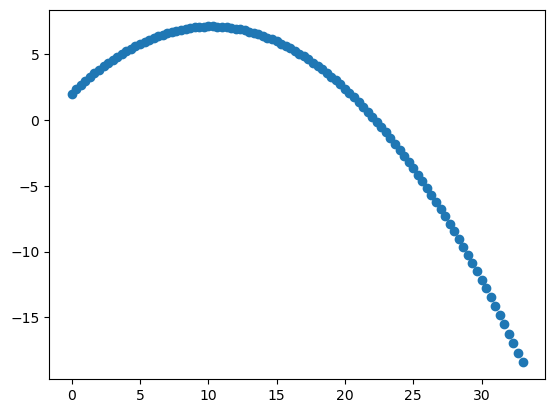

In [12]:
plt.scatter(all_pos[:, 0], all_pos[:, 1])

In [13]:
#all_pos = all_pos.reshape((100,1))
#all_pos.shape

In [14]:
all_pos.shape

(100, 2)

In [15]:
all_pos

array([[  0.        ,   2.        ],
       [  0.33333334,   2.32788324],
       [  0.66666669,   2.6448667 ],
       [  1.        ,   2.95094991],
       [  1.33333337,   3.24613357],
       [  1.66666675,   3.53041673],
       [  2.        ,   3.80380011],
       [  2.33333325,   4.06628323],
       [  2.66666675,   4.3178668 ],
       [  3.        ,   4.55854988],
       [  3.33333349,   4.78833342],
       [  3.66666675,   5.00721693],
       [  4.        ,   5.21519995],
       [  4.33333349,   5.41228342],
       [  4.66666651,   5.5984664 ],
       [  5.        ,   5.77374983],
       [  5.33333349,   5.93813324],
       [  5.66666651,   6.09161663],
       [  6.        ,   6.2342    ],
       [  6.33333302,   6.36588287],
       [  6.66666698,   6.48666668],
       [  7.        ,   6.59654999],
       [  7.33333349,   6.69553375],
       [  7.66666651,   6.78361607],
       [  8.        ,   6.86079979],
       [  8.33333302,   6.92708302],
       [  8.66666698,   6.9824667 ],
 

$| |A(x) - b| |_2^2$

In [16]:
Ax = simulator(x, t=3)

$\arg \min_x | |A(x) - b| |_2^2$

In [17]:
x = torch.tensor([0., 0., 0., 0.]), 

In [20]:
b = simulator(x, t=3)

In [5]:
x = torch.tensor([0., 0., 0., 0.],requires_grad=True)
optimizer = torch.optim.SGD([x], lr=1e-4)

train_loss = []
for epoch in range(10000):

    Ax = simulator(x, t=3)
    loss = ((Ax - b)**2).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())


In [6]:
import torch

# Example tensors
x = torch.tensor([0., 0., 0., 0.], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=1e-4)

# Example simulator function
def simulator(x, t):
    return x + t  # Replace with actual implementation

# Example target value
b = torch.tensor([1., 1., 1., 1.])

train_loss = []
for epoch in range(10000):
    Ax = simulator(x, t=3)  # This should create a new computation graph
    loss = ((Ax - b)**2).mean()

    optimizer.zero_grad()
    loss.backward()  # Default is fine unless you intentionally need to reuse the graph
    optimizer.step()

    train_loss.append(loss.item())


In [7]:
train_loss

[4.0,
 3.999600410461426,
 3.999199867248535,
 3.998800277709961,
 3.9983999729156494,
 3.998000383377075,
 3.99760103225708,
 3.9972004890441895,
 3.9968011379241943,
 3.99640154838562,
 3.996002197265625,
 3.9956018924713135,
 3.9952025413513184,
 3.9948031902313232,
 3.994403839111328,
 3.994004487991333,
 3.993605375289917,
 3.993206024169922,
 3.9928059577941895,
 3.9924066066741943,
 3.9920074939727783,
 3.991608142852783,
 3.991209030151367,
 3.990809917449951,
 3.990410804748535,
 3.9900126457214355,
 3.9896135330200195,
 3.9892146587371826,
 3.9888155460357666,
 3.9884164333343506,
 3.9880175590515137,
 3.9876184463500977,
 3.987220525741577,
 3.9868216514587402,
 3.986422538757324,
 3.9860236644744873,
 3.985625743865967,
 3.98522686958313,
 3.984827995300293,
 3.9844303131103516,
 3.9840314388275146,
 3.983633518218994,
 3.9832348823547363,
 3.9828360080718994,
 3.982438325881958,
 3.9820396900177,
 3.981642007827759,
 3.981243133544922,
 3.9808454513549805,
 3.9804477691650

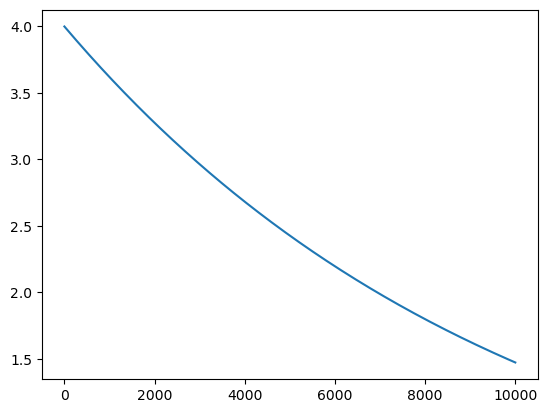

In [8]:
plt.plot(train_loss)

In [9]:
import torch

# Example tensors
x = torch.tensor([0., 0., 0., 0.], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=1e-4)

def simulator(x, t=3):
    
    x0, v0 = x[:2], x[2:]

    a = torch.tensor([0, -9.81])
    v = v0 + a * t
    x = x0 + v0 * t + .5 * a * t**2
        
    return torch.cat((x, v))
# Example target value
b = torch.tensor([1., 1., 1., 1.])

train_loss = []
for epoch in range(10000):
    Ax = simulator(x, t=3)  # This should create a new computation graph
    loss = ((Ax - b)**2).mean()

    optimizer.zero_grad()
    loss.backward()  # Default is fine unless you intentionally need to reuse the graph
    optimizer.step()

    train_loss.append(loss.item())


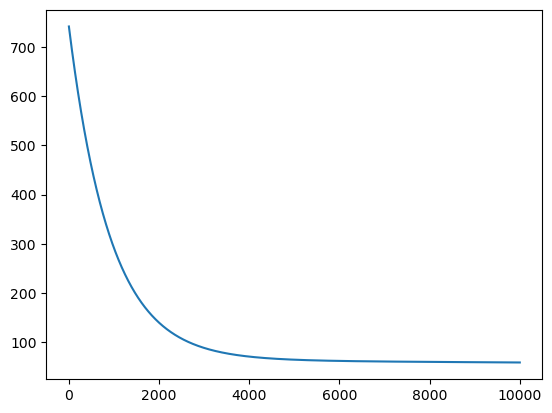

In [10]:
plt.plot(train_loss)

In [11]:
x[0]

tensor(0.0144, grad_fn=<SelectBackward0>)

In [12]:
x # this x gives the final position and velocity of the object
# but now the value of x is not the initial value of x, it is the final value of x
# after the optimization process

tensor([1.4428e-02, 2.2733e+00, 3.8840e-01, 1.5700e+01], requires_grad=True)

In [13]:
x[1]

tensor(2.2733, grad_fn=<SelectBackward0>)

In [14]:
Ax # this is the final position and velocity of the object after 3 seconds
# this value is close to b and the loss is also very low
# this means that the optimization process is working

tensor([  1.1796,   5.2276,   0.3884, -13.7303], grad_fn=<CatBackward0>)